In [1]:
#import basic modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import time
import seaborn as sns

warnings.filterwarnings("ignore") 
pd.set_option('max_rows', 500) 

# Exploratory Data Analysis

**1. GETTING THE DATA**

In [2]:
meal_data = pd.read_excel('/Users/jcunanan/Downloads/Meal-Analysis-2017.xlsx', index_col=0)

In [3]:
meal_data.shape

(1315, 17)

In [4]:
meal_data.head()

Type  gender   age  height  weight  EER[kcal]  P target(15%)[g]  \
1  breakfast  female  32.0   157.0    48.0       1655         62.043750   
2  breakfast  female  35.0   161.0    55.0       2073         77.745091   
3  breakfast  female  26.0   159.0    51.0       2042         76.584375   
4  breakfast  female  48.0   164.0    57.0       1772         66.431250   
5     dinner  female  48.0   164.0    57.0       1772         66.431250   

   F target(25%)[g]  C target(60%)[g]  number of dishes  E[kcal]   P[g]  \
1         45.958333        248.175000                 2   333.87   5.85   
2         57.588956        310.980364                 2   213.85   4.62   
3         56.729167        306.337500                 4   351.59  27.31   
4         49.208333        265.725000                 2   295.43   5.63   
5         49.208333        265.725000                 5   876.19  41.46   

    F[g]   C[g]  Salt[g]  Vegetables[g]  Score(1:worst 2:bad 3:good 4:best)  
1   0.75  75.69     0.21           29.0                                   2  
2   4.48  41.25     0.11            0.0                                   1  
3  18.85  18.10     2.84          116.4                                   2  
4   0.89  65.08     0.65          189.0                                   2  
5  34.16  96.30     6.37           53.5                                   2

In [5]:
meal_data.tail()

Type gender   age  height  weight  EER[kcal]  P target(15%)[g]  \
1311      lunch   male  39.0   170.0    60.0       1685          63.16875   
1312  breakfast   male  39.0   173.0    58.0       2105          78.91875   
1313  breakfast   male  39.0   170.0    60.0       1685          63.16875   
1314     dinner   male  39.0   173.0    58.0       2105          78.91875   
1315      lunch   male  39.0   173.0    58.0       2105          78.91875   

      F target(25%)[g]  C target(60%)[g]  number of dishes  E[kcal]   P[g]  \
1311         46.791667           252.675                 2   690.60  19.05   
1312         58.458333           315.675                 2   292.66   6.02   
1313         46.791667           252.675                 1   158.40   5.58   
1314         58.458333           315.675                 1   363.82  15.20   
1315         58.458333           315.675                 1   879.37  27.63   

       F[g]    C[g]  Salt[g]  Vegetables[g]  \
1311  33.96   71.89     1.60           60.0   
1312  10.76   42.38     0.97            0.0   
1313   2.64   28.02     0.78            0.0   
1314  12.68   44.18     1.35           22.0   
1315  31.93  113.66     4.23           52.0   

      Score(1:worst 2:bad 3:good 4:best)  
1311                                   1  
1312                                   1  
1313                                   1  
1314                                   2  
1315                                   2

In [6]:
meal_data.describe()

age       height       weight    EER[kcal]  P target(15%)[g]  \
count  1314.000000  1314.000000  1314.000000  1315.000000       1315.000000   
mean     39.703196   166.562405    58.714612  2176.253992         81.604021   
std       9.369062     6.498895     8.368238   313.538696         11.757694   
min      22.000000   152.000000    45.000000  1545.000000         57.949864   
25%      35.000000   160.000000    51.250000  2020.000000         75.731250   
50%      39.000000   167.000000    58.000000  2105.000000         78.918750   
75%      44.000000   173.000000    63.000000  2376.000000         89.114456   
max      62.000000   179.000000    91.000000  3380.000000        126.750000   

       F target(25%)[g]  C target(60%)[g]  number of dishes      E[kcal]  \
count       1315.000000       1315.000000       1315.000000  1315.000000   
mean          60.447423        326.416085          2.707224   594.993894   
std            8.709403         47.030777          1.613367   309.082985   
min           42.925825        231.799455          1.000000     0.000000   
25%           56.097222        302.925000          1.000000   371.690000   
50%           58.458333        315.675000          2.000000   564.170000   
75%           66.010708        356.457825          4.000000   780.430000   
max           93.888889        507.000000         13.000000  2382.340000   

              P[g]         F[g]         C[g]      Salt[g]  Vegetables[g]  \
count  1315.000000  1315.000000  1315.000000  1315.000000    1315.000000   
mean     21.301460    23.551567    69.478464     3.002091      72.791148   
std      12.804031    18.162848    36.229788     1.995371      80.957033   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%      12.265000     9.945000    42.360000     1.490000       0.000000   
50%      20.150000    19.440000    67.750000     2.720000      47.000000   
75%      28.125000    33.085000    92.715000     4.200000     120.850000   
max      94.010000   141.660000   239.760000    14.740000     621.500000   

       Score(1:worst 2:bad 3:good 4:best)  
count                         1315.000000  
mean                             1.965779  
std                              0.712713  
min                              1.000000  
25%                              2.000000  
50%                              2.000000  
75%                              2.000000  
max                              4.000000

In [7]:
meal_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315 entries, 1 to 1315
Data columns (total 17 columns):
Type                                  1314 non-null object
gender                                1314 non-null object
age                                   1314 non-null float64
height                                1314 non-null float64
weight                                1314 non-null float64
EER[kcal]                             1315 non-null int64
P target(15%)[g]                      1315 non-null float64
F target(25%)[g]                      1315 non-null float64
C target(60%)[g]                      1315 non-null float64
number of dishes                      1315 non-null int64
E[kcal]                               1315 non-null float64
P[g]                                  1315 non-null float64
F[g]                                  1315 non-null float64
C[g]                                  1315 non-null float64
Salt[g]                               1315 non-null float64

**2. DISTRIBUTIONS OF NUMERICAL FEATURES**

We first look at the distribution of our target variable

In [8]:
meal_data.rename(columns={'Score(1:worst 2:bad 3:good 4:best)':'Score'}, inplace=True)

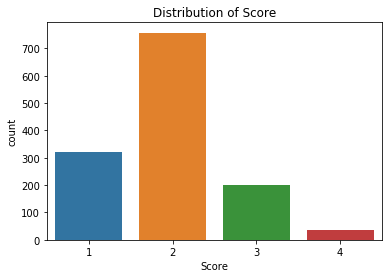

In [9]:
# Plotting the distribution of Scores
plt.figure()
sns.countplot(meal_data.Score)
plt.title('Distribution of Score')
plt.show()

We see that there is a **class imbalance!** Thus, the metric **accuracy** is a not a good metric to use.
Also, food was not so great in this data :(

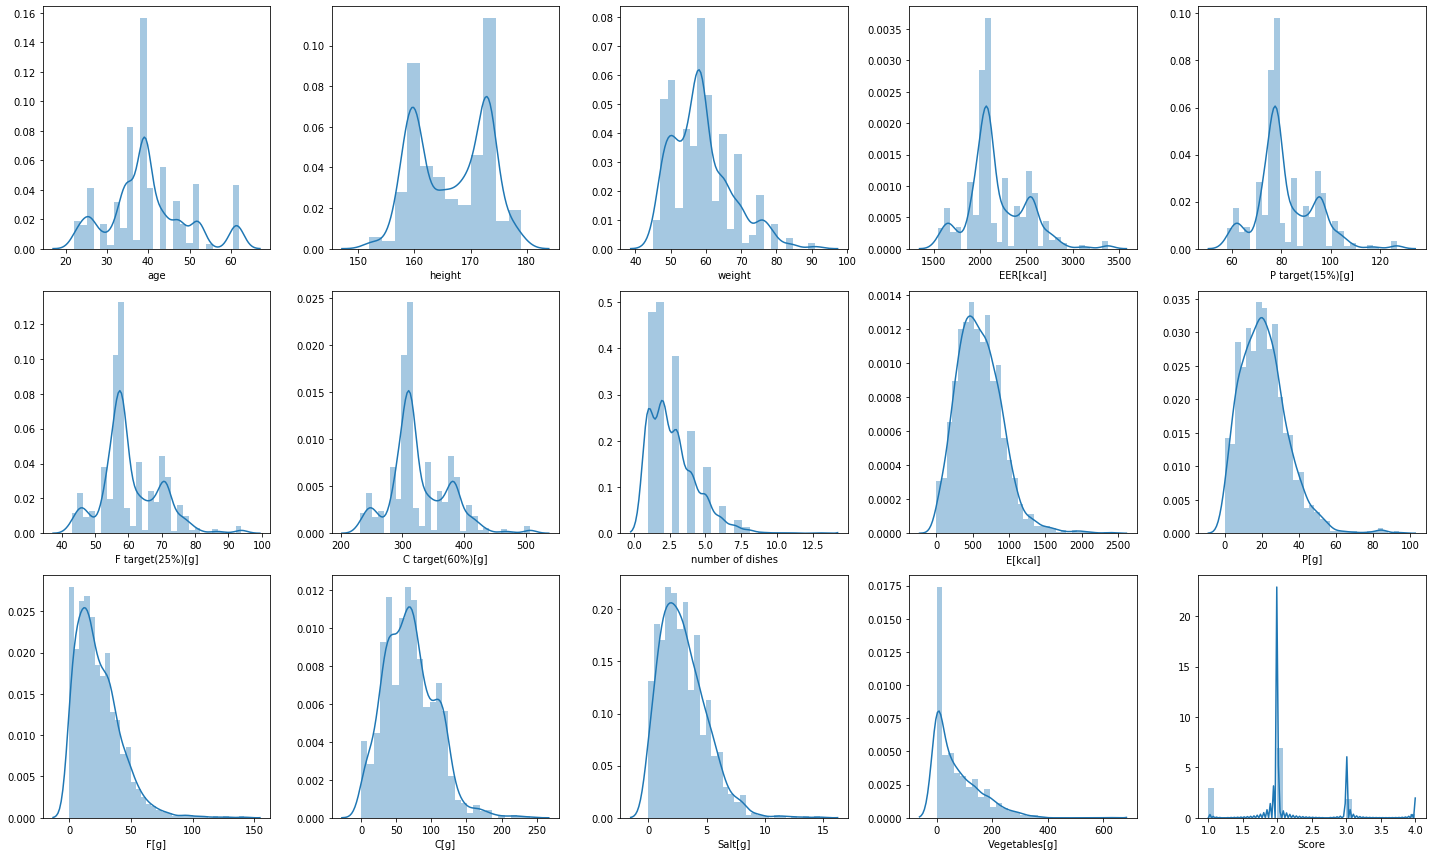

In [10]:
# create a new dataframe with columns containing only the numerical features
num_features = meal_data.select_dtypes(exclude='object').copy()

# we plot individual column distributions with null entry rows dropped
fig, axs = plt.subplots(3, 5, figsize=(20, 12))
for i in range(len(num_features.columns)):
    plt.subplot(3, 5, i+1)
    sns.distplot(num_features.iloc[:,i].dropna())
    plt.xlabel(num_features.columns[i])

plt.tight_layout()
plt.show()

> We see that a number of features are skewed right (positive skew). We might need to transform(normalize) these features later.

**3. DISTRIBUTIONS OF CATEGORICAL FEATURES**

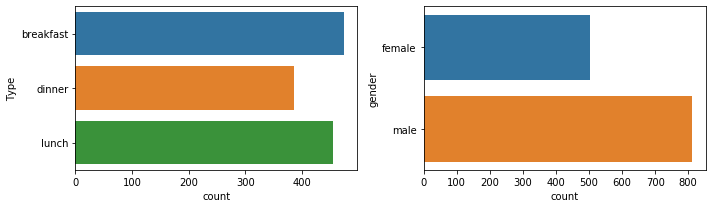

In [11]:
# create a new dataframe with columns containing only the categorical features
cat_features = meal_data.select_dtypes(include='object').copy()

# we plot individual column distributions with null entry rows dropped
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
plt.subplots_adjust(right=1.5, top=1.25)

for i in range(len(cat_features.columns)):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=cat_features.columns[i], data=cat_features)
    
plt.tight_layout()
plt.show()

> People in the data tends to skip dinner. 
> There are ~50% more males than females

**4. SEGMENTATIONS**

Here we try to see some connections/ relationships between categorical features and numerical features

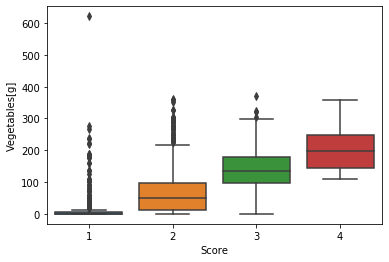

In [12]:
# Segment Score by HouseStyle and plot distributions
sns.boxplot(y='Vegetables[g]', x='Score', data=meal_data)

1. An obvious observation is that the more vegetables the highier the score! 
2. 1 outlier on Score 1 with a very high vegetable amount.

**5. CORRELATIONS**

Finally we look at the relationships between numeric features.

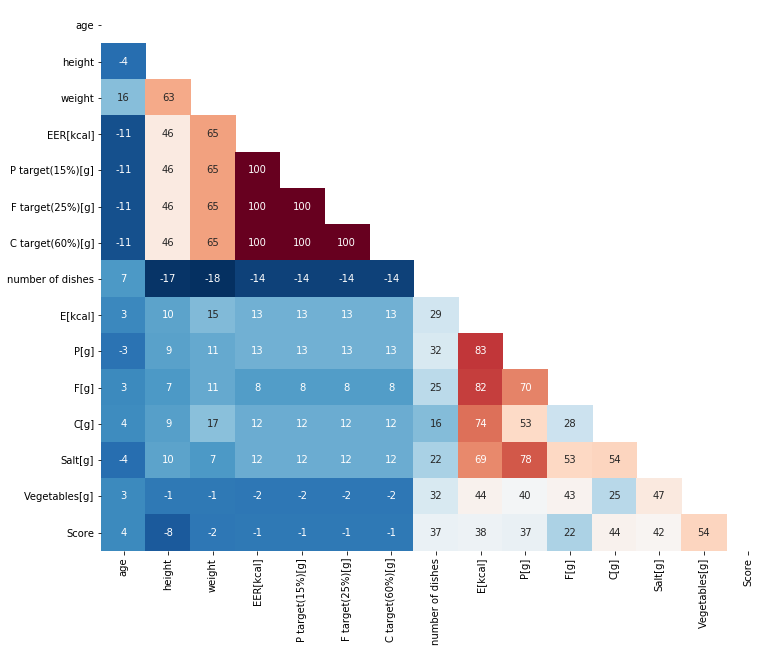

In [13]:
# Get correlation 
correlations = meal_data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Make the figsize 10 x 8
plt.figure(figsize=(12,10))

# Plot heatmap of correlations
sns.heatmap(correlations*100, cmap='RdBu_r' , annot=True, fmt='.0f', mask=mask, cbar=False,)

> The only feature so far with the highest correlation to score is Vegetables.

# Data Cleaning

**1. Drop unwanted observations**

In [14]:
print('DataFrame shape BEFORE dropping duplicates: {}'.format(meal_data.shape))
meal_data = meal_data.drop_duplicates()
print('DataFrame shape AFTER dropping duplicates: {}'.format(meal_data.shape))

DataFrame shape BEFORE dropping duplicates: (1315, 17)
DataFrame shape AFTER dropping duplicates: (1202, 17)


**2. Remove unwanted outliers**

Using a scatter plot helps us easily identify columns with outstanding outliers

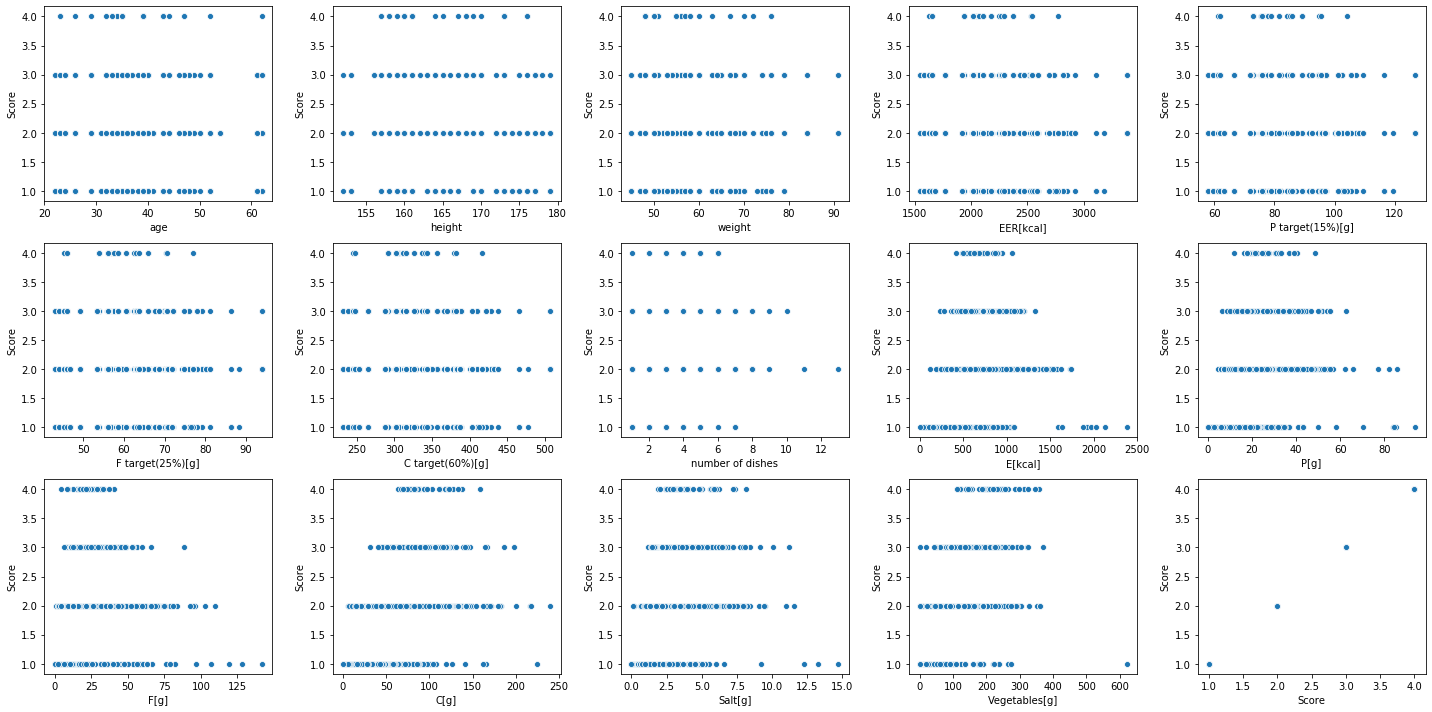

In [15]:
# We build a scatter for each numerical column feature vs our target
fig, axs = plt.subplots(3, 5, figsize=(20, 10))
for i in range(len(num_features.columns)):
    plt.subplot(3, 5, i+1)
    sns.scatterplot(num_features.iloc[:,i].dropna(), meal_data.Score)
    plt.xlabel(num_features.columns[i])

plt.tight_layout()
plt.show()

**3. Identify missing values**

We define a function below and run a for-loop to print information about missing values of the data

In [16]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    
display_missing(meal_data)

Type column missing values: 1
gender column missing values: 1
age column missing values: 1
height column missing values: 1
weight column missing values: 1
EER[kcal] column missing values: 0
P target(15%)[g] column missing values: 0
F target(25%)[g] column missing values: 0
C target(60%)[g] column missing values: 0
number of dishes column missing values: 0
E[kcal] column missing values: 0
P[g] column missing values: 0
F[g] column missing values: 0
C[g] column missing values: 0
Salt[g] column missing values: 0
Vegetables[g] column missing values: 0
Score column missing values: 0


> We will deal with this after doing some more digging. 

# Feature Engineering

It was mentioned in the description that the data comes from 60 people. Let us try to see if we can verify that information.

In [17]:
meal_data.nunique()

Type                   3
gender                 2
age                   27
height                25
weight                29
EER[kcal]             61
P target(15%)[g]      63
F target(25%)[g]      63
C target(60%)[g]      63
number of dishes      12
E[kcal]             1088
P[g]                 973
F[g]                 976
C[g]                1034
Salt[g]              521
Vegetables[g]        495
Score                  4
dtype: int64

>We actually have **63** unique profiles in our data for target Protein, Fats and Carbs. Using the descriptions provided, this might mean we have **63** people in the data or some people's dietary targets changed on different days. Whatever the case, we can make new features/columns for these unique dietary targets by mapping an integer to each unique values.

In [18]:
# create a mapping for each unique Protein target to a unique target profile
# the values are sorted in increasing order
target_grp = dict(enumerate(np.sort(meal_data['P target(15%)[g]'].unique())))
t_map = {target: g for g, target in target_grp.items()}


In [19]:
meal_data['target_grp']= meal_data['P target(15%)[g]'].map(t_map)
meal_data['target_grp'][:10] # show the first 10 rows

1      6
2     19
3     18
4      8
5      8
6      8
7      8
8      8
9      8
10     8
Name: target_grp, dtype: int64

Let's have a quick look at our data frame

In [20]:
meal_data.head(10)

Type  gender   age  height  weight  EER[kcal]  P target(15%)[g]  \
1   breakfast  female  32.0   157.0    48.0       1655         62.043750   
2   breakfast  female  35.0   161.0    55.0       2073         77.745091   
3   breakfast  female  26.0   159.0    51.0       2042         76.584375   
4   breakfast  female  48.0   164.0    57.0       1772         66.431250   
5      dinner  female  48.0   164.0    57.0       1772         66.431250   
6       lunch  female  48.0   164.0    57.0       1772         66.431250   
7   breakfast  female  48.0   164.0    57.0       1772         66.431250   
8         NaN     NaN   NaN     NaN     NaN       1772         66.431250   
9      dinner  female  48.0   164.0    57.0       1772         66.431250   
10      lunch  female  48.0   164.0    57.0       1772         66.431250   

    F target(25%)[g]  C target(60%)[g]  number of dishes  E[kcal]   P[g]  \
1          45.958333        248.175000                 2   333.87   5.85   
2          57.588956        310.980364                 2   213.85   4.62   
3          56.729167        306.337500                 4   351.59  27.31   
4          49.208333        265.725000                 2   295.43   5.63   
5          49.208333        265.725000                 5   876.19  41.46   
6          49.208333        265.725000                 1   424.04  14.52   
7          49.208333        265.725000                 1   346.63  11.13   
8          49.208333        265.725000                 3   238.44   6.14   
9          49.208333        265.725000                 1   563.33  22.50   
10         49.208333        265.725000                 1   266.00   7.50   

     F[g]   C[g]  Salt[g]  Vegetables[g]  Score  target_grp  
1    0.75  75.69     0.21           29.0      2           6  
2    4.48  41.25     0.11            0.0      1          19  
3   18.85  18.10     2.84          116.4      2          18  
4    0.89  65.08     0.65          189.0      2           8  
5   34.16  96.30     6.37           53.5      2           8  
6   24.97  34.41     2.28           33.0      2           8  
7    8.55  54.02     2.00            6.0      2           8  
8   10.92  31.11     1.60          299.0      3           8  
9   20.25  67.92     2.17          125.0      2           8  
10   5.04  47.69     0.67            0.0      1           8

**We now see that the missing values is from a user with profile 8**

So we can now fill in the all missing details except for 'Type' column.

In [21]:
meal_data['gender'][8] = 'female'
meal_data['age'][8] = 48
meal_data['height'][8] = 164
meal_data['weight'][8] = 57
meal_data['Type'][8] = 'breakfast' # guess based on calories

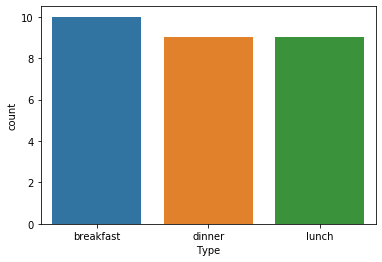

In [22]:
# make a DataFrame for target group 8
tg_8 = meal_data.loc[(meal_data['target_grp'] == 8) & (meal_data['gender']=='female')]
sns.countplot(tg_8['Type'])

In [23]:
meal_data.isnull().any().sum() # the sum being zero means there are no more missing values!

0

Below we will prepare our data for the CatBoost algorithm. We will not need to one-hot encode our data for this algorithms so we will separate a different dataframe to use.

In [24]:
gbm_data = meal_data.copy()

We also verified that **target groups** are not unique individuals: For example,
1. at index 95 for female of age 35, height 161 is in the same group as another female of age 41.

Let use use the groupby method to see clearly

In [25]:
#Below find the number of unique values for each target_grp. 
meal_data.groupby('target_grp')['age','gender','height','weight'].nunique() [:20]

age  gender  height  weight
target_grp                             
0             1       1       1       1
1             1       1       1       1
2             1       1       1       1
3             1       1       1       1
4             4       1       4       3
5             1       1       1       1
6             5       2       5       4
7             1       1       1       1
8             3       2       3       3
9             1       1       1       1
10            6       2       5       6
11            1       1       1       1
12            1       1       1       1
13            1       1       1       1
14            3       2       3       3
15            1       1       1       1
16            1       1       1       1
17            1       1       1       1
18            8       2       7       7
19            5       2       5       5

In [26]:
meal_data.loc[meal_data['target_grp']==10]

Type  gender   age  height  weight  EER[kcal]  P target(15%)[g]  \
18       lunch  female  31.0   158.0    52.0       1921         72.033865   
39   breakfast    male  39.0   173.0    58.0       1921         72.033865   
49      dinner  female  26.0   159.0    51.0       1921         72.033865   
61   breakfast    male  34.0   167.0    63.0       1921         72.033865   
70   breakfast  female  35.0   161.0    55.0       1921         72.033865   
89   breakfast    male  39.0   173.0    58.0       1921         72.033865   
91       lunch  female  31.0   158.0    52.0       1921         72.033865   
101     dinner  female  37.0   161.0    48.0       1921         72.033865   
111     dinner  female  37.0   161.0    48.0       1921         72.033865   
112      lunch  female  37.0   161.0    48.0       1921         72.033865   
113  breakfast  female  37.0   161.0    48.0       1921         72.033865   

     F target(25%)[g]  C target(60%)[g]  number of dishes  E[kcal]   P[g]  \
18          53.358419        288.135461                 1   380.29   6.28   
39          53.358419        288.135461                 2   130.77   5.03   
49          53.358419        288.135461                 2   551.73  19.46   
61          53.358419        288.135461                 1   190.14   3.14   
70          53.358419        288.135461                 3   332.37   8.03   
89          53.358419        288.135461                 3   740.31  21.54   
91          53.358419        288.135461                 3   195.35   3.49   
101         53.358419        288.135461                 1   404.43  11.45   
111         53.358419        288.135461                 1   363.82  15.20   
112         53.358419        288.135461                 2   474.71   7.76   
113         53.358419        288.135461                 1   404.27  12.27   

      F[g]    C[g]  Salt[g]  Vegetables[g]  Score  target_grp  
18    0.77   84.02     1.82            0.0      1          10  
39    3.51   20.14     1.39           30.0      1          10  
49   45.91   11.83     2.27          110.7      2          10  
61    0.38   42.01     0.91            0.0      1          10  
70    3.87   64.66     1.39           30.0      2          10  
89   46.76   56.05     2.65          241.5      2          10  
91    0.42   48.34     0.00            0.0      1          10  
101  15.49   51.88     2.37           85.6      2          10  
111  12.68   44.18     1.35           22.0      2          10  
112   1.21  104.51     2.23            0.0      1          10  
113  11.93   62.25     0.97          102.5      1          10

**Transforming categorical data**

We now onehot encode the Type and gender features.

In [27]:
meal_data = pd.get_dummies(meal_data.copy(), columns=cat_features.columns)
meal_data.head() # give it a quick look one more time

age  height  weight  EER[kcal]  P target(15%)[g]  F target(25%)[g]  \
1  32.0   157.0    48.0       1655         62.043750         45.958333   
2  35.0   161.0    55.0       2073         77.745091         57.588956   
3  26.0   159.0    51.0       2042         76.584375         56.729167   
4  48.0   164.0    57.0       1772         66.431250         49.208333   
5  48.0   164.0    57.0       1772         66.431250         49.208333   

   C target(60%)[g]  number of dishes  E[kcal]   P[g]  ...   C[g]  Salt[g]  \
1        248.175000                 2   333.87   5.85  ...  75.69     0.21   
2        310.980364                 2   213.85   4.62  ...  41.25     0.11   
3        306.337500                 4   351.59  27.31  ...  18.10     2.84   
4        265.725000                 2   295.43   5.63  ...  65.08     0.65   
5        265.725000                 5   876.19  41.46  ...  96.30     6.37   

   Vegetables[g]  Score  target_grp  Type_breakfast  Type_dinner  Type_lunch  \
1           29.0      2           6               1            0           0   
2            0.0      1          19               1            0           0   
3          116.4      2          18               1            0           0   
4          189.0      2           8               1            0           0   
5           53.5      2           8               0            1           0   

   gender_female  gender_male  
1              1            0  
2              1            0  
3              1            0  
4              1            0  
5              1            0  

[5 rows x 21 columns]

# Machine Learning Models (scikit-learn)

In [28]:
# Import classifiers
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifierCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
# Top 3 GBMs
import xgboost as xgb
import lightgbm as lgb
import catboost as cat

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function for creating model pipelines
from sklearn.pipeline import  make_pipeline

# Helper for cross-validation
from sklearn.model_selection import GridSearchCV, GroupKFold, StratifiedKFold

# For standardization
from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler

# For dimensionality reduction
from sklearn.decomposition import PCA

**1. Split the data**

In [29]:
# Define our features dataframe X and labels y
X= meal_data.drop(['Score'], axis=1)
y= meal_data.Score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=505, stratify=y)

# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

961 241
961 241


**2. Build base models and model pipelines**

In [30]:
# Pipeline dictionary
pipelines = {
    'lr': make_pipeline(StandardScaler(), 
                        LogisticRegressionCV(n_jobs=-1, random_state=505)),
   # 'rdg': make_pipeline(StandardScaler(),
    #                       RidgeClassifierCV()),
    'svc': make_pipeline(StandardScaler(),
                        SVC(random_state=505, probability=True)),
    'rf': make_pipeline(StandardScaler(), 
                            RandomForestClassifier(n_estimators=100, max_depth=15, random_state=505)),
    'knc': make_pipeline(StandardScaler(),
                            KNeighborsClassifier(n_jobs=-1)),
    'gpc': make_pipeline(StandardScaler(),
                            GaussianProcessClassifier(n_jobs=-1,random_state=505)),
}

## Choice of metric evaluation

**1. Quadratic Cohen's Kappa**
>Cohen’s kappa statistic measures interrater reliability (sometimes called interobserver agreement). Interrater reliability, or precision, happens when your data raters (or collectors) give the same score to the same data item.
In our case, we have **labels VS predictions**. The Kappa statistic takes into account this element of chance.

The Kappa statistic varies from 0 to 1, where.

0 = agreement equivalent to chance.\
0.1 – 0.20 = slight agreement.\
0.21 – 0.40 = fair agreement.\
0.41 – 0.60 = moderate agreement.\
0.61 – 0.80 = substantial agreement.\
0.81 – 0.99 = near perfect agreement\
1 = perfect agreement.

**2. Micro-averaged Precision score**

>The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. 

For multiclass classification, Micro-average is preferable if there is a class imbalance problem.

In [31]:
# Classification metrics 
from sklearn.metrics import precision_score, cohen_kappa_score

# Initiate empty dictionary of fitted base models
fitted_basemodels = {}
# Loop through model pipelines
for name, pipeline in pipelines.items():
  
    # Fit model on X_train, y_train  and predict with X_test
    base_mod = pipeline.fit(X_train, y_train)
    #pred = pipeline.predict(X_test)
    pred = pipeline.predict(X_test)
    pred_prob = pipeline.predict_proba(X_test)
    
    # Store model in fitted_models[name] 
    fitted_basemodels[name] = base_mod
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')
   # print('accuracy on test: ', pipeline.score(X_test,y_test))
    print('precision score: ', precision_score(y_test, pred,  average='micro'))
    print('Kappa on test: ', cohen_kappa_score(y_test, pred, weights='quadratic'))
    print('\n')  
    

lr has been fitted.
precision score:  0.6597510373443983
Kappa on test:  0.5251928236083165


svc has been fitted.
precision score:  0.7510373443983402
Kappa on test:  0.6734066123168923


rf has been fitted.
precision score:  0.7634854771784232
Kappa on test:  0.6952856884821483


knc has been fitted.
precision score:  0.6597510373443983
Kappa on test:  0.5555578072753066


gpc has been fitted.
precision score:  0.7012448132780082
Kappa on test:  0.6247754401373309




**The reason for this basemodel pipeline is to help us improve feature engineering. This pipeline takes a few seconds to run and the results are reasonable. Thus, the effect of adding/removing features will be reflected and observed easily here.**

**Once we are satisfied with our features, we can now move forward to hyperparameter optimization**

**3. Hyperparameter tuning**

In [32]:
pipelines['rf'].get_params() # This is how we get the format of hyperparameter dictionaries for GridSearch

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('randomforestclassifier',
   RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                          criterion='gini', max_depth=15, max_features='auto',
                          max_leaf_nodes=None, max_samples=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_jobs=None, oob_score=False, random_state=505,
                          verbose=0, warm_start=False))],
 'verbose': False,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'randomforestclassifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=15, max_features='auto',
                  

In [33]:
# Create a dictionary for each models hyperparameters

svc_hyparams = {'svc__C': [0.1, 1, 10, 100, 1000],
               'svc__gamma': [0.1, 1, 10, 100]
               }

rf_hyparams  = {
    'randomforestclassifier__n_estimators': [100,200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33],
    'randomforestclassifier__max_depth': [8, 15],
    'randomforestclassifier__min_samples_split': [2, 5 ],
    'randomforestclassifier__min_samples_leaf': [1, 2, 10]
}

knc_hyparams =  {
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__p': [1, 1.5 , 2, 10],
    'kneighborsclassifier__n_neighbors': np.arange(2,10),
 }

In [34]:
# Now create a dictionary of hyperparameter dictionaries !?
hyperparameters = {
    'lr': {},
    'svc': svc_hyparams,
    'rf': rf_hyparams,
    'knc': knc_hyparams,
    'gpc':{}
}

In [35]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv = 5, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lr has been fitted.
svc has been fitted.
rf has been fitted.
knc has been fitted.
gpc has been fitted.


Now let us check the scores of our fine-tuned models using **precision_score and quadratic weighted kappa**

In [36]:
for name, model in fitted_models.items():
    
    pred = model.predict(X_test)
    print('precision score: ', precision_score(y_test, pred,  average='micro'))
    print(name,'Kappa on test:', cohen_kappa_score(y_test, pred, weights='quadratic'))
    print('-'*30)

precision score:  0.6597510373443983
lr Kappa on test: 0.5251928236083165
------------------------------
precision score:  0.7510373443983402
svc Kappa on test: 0.6698989020545711
------------------------------
precision score:  0.7842323651452282
rf Kappa on test: 0.7339795693098119
------------------------------
precision score:  0.6804979253112033
knc Kappa on test: 0.5828101862473147
------------------------------
precision score:  0.7012448132780082
gpc Kappa on test: 0.6247754401373309
------------------------------


> Since the random forest model wins, we will choose it as the winner among the scikit-learn models. Later, I will to compare our scikit-learn results with CatBoost algorithm

> Using our best scikit-learn model, Random Forest, we plot the importance of our features. 
**Vegetables[g] is the leading feature for our Random Forest model**. We have also observed earlier that Vegetables have the highest correlation to our Scores column.

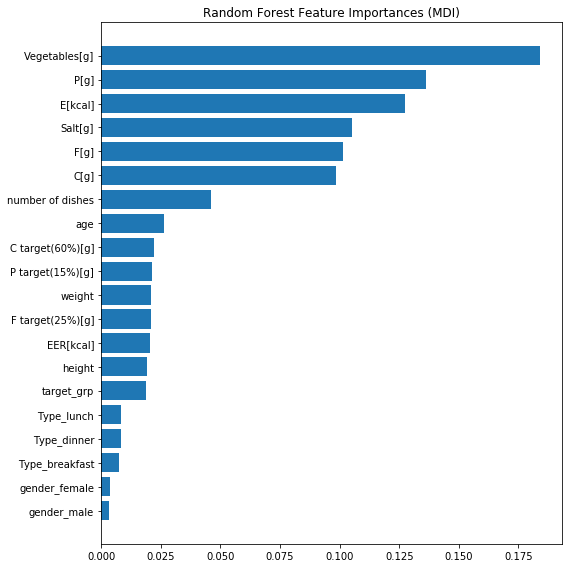

In [37]:
feature_names = np.r_[X_train.columns.to_list()]
tree_feature_importances = (
    fitted_models['rf'].estimator['randomforestclassifier'].feature_importances_.reshape(1,20)[0])
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(8,8))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

# Machine Learning Models (CatBoost)

**Below we will see the advantage of using the CatBoost gradient boosting method for data with categorical features**

In [38]:
def oof_trainer(X: pd.DataFrame,
                y,
            n_folds = None,
            params: dict = None,
            del_cols: list = None,
            cat_features=None):
    
    """This function trains multiple Catboost model while performing stratified CV with shuffling.
    out-of-fold (oof) predictions are evaluated at each fold and printed out 
    at the end of the routine as a list. The mean scores on all fold is also printed out.
    
    The metrics used for evaluation are precision_auc and the cohen's kappa
    
    Output: 
    models -- a list of models trained on each fold during CV
    oof_pred -- prediction array consisting of predictions coming from different models
    """
        
    # collect models and scores from each fold
    models = []
    scores = []
    scores_prob = []
    # CV splitter
    folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=505) #GroupKFold(n_splits=n_folds) 
    #features to use
    columns = [col for col in X.columns.values if not col in del_cols]
    # dimension of the target 
    n_target=1
    
    # collect out-of-sample predictions
    data_X, data_y, oof_pred = pd.DataFrame(), pd.Series(), np.zeros((len(X),n_target))


    for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
     
        print('Fold {} started at {}'.format(fold_n + 1,time.ctime()))
        #print((train_index, valid_index))
        X_train, X_valid = X.iloc[train_index][columns], X.iloc[valid_index][columns]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
        data_X = data_X.append(X_valid)
        data_y = data_y.append(y_valid)
        print(data_X.shape)
        
        #Eval set preparation
        eval_set = [(X_train, y_train)]
       # eval_names = ['train']
        eval_set.append((X_valid, y_valid))
       # eval_names.append('valid')
    
        model = cat.CatBoostClassifier(eval_metric='WKappa')
        model.fit(X=X_train, y=y_train, 
                       eval_set=eval_set, 
                       verbose=500, early_stopping_rounds=150,
                      cat_features=cat_features, use_best_model=True, plot=True)
        
        oof_pred[valid_index] = model.predict(X_valid).reshape(-1, n_target)
        models.append(model)
    
        print('-'*30)
    
        score = cohen_kappa_score(y_valid, oof_pred[valid_index], weights='quadratic')
        scores.append(score)
        score_prob = precision_score(y_valid, oof_pred[valid_index],   average='micro')
        scores_prob.append(score_prob)

    print(f'catb fold kappa scores: {scores}')
    print(f'catb fold kappa scores mean: {np.mean(scores)}')
    print(f'catb fold precision-micro scores: {scores_prob}')
    print(f'catb fold precision-micro scores mean: {np.mean(scores_prob)}')
   
    return models, oof_pred

In [39]:
# feature selection for Catboost
cat_features = ['Type', 'gender']

models, oof_pred = oof_trainer(X=gbm_data,
                    y=y,
                    n_folds = 5,
                   # params=params,
                    del_cols=['Score'],
                    cat_features=cat_features)

Fold 1 started at Fri Jan 31 18:05:22 2020
(241, 17)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4226775	test: 0.4226775	test1: 0.3946572	best: 0.3946572 (0)	total: 84.2ms	remaining: 1m 24s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.7679879453
bestIteration = 130

Shrink model to first 131 iterations.
------------------------------
Fold 2 started at Fri Jan 31 18:05:26 2020
(482, 17)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7038372	test: 0.7038372	test1: 0.5967708	best: 0.5967708 (0)	total: 39.5ms	remaining: 39.4s
500:	learn: 0.9051671	test: 0.8850121	test1: 0.7392209	best: 0.7517409 (457)	total: 8.73s	remaining: 8.7s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.751740904
bestIteration = 457

Shrink model to first 458 iterations.
------------------------------
Fold 3 started at Fri Jan 31 18:05:37 2020
(722, 17)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6581055	test: 0.6581055	test1: 0.6472801	best: 0.6472801 (0)	total: 20.1ms	remaining: 20.1s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.786493753
bestIteration = 265

Shrink model to first 266 iterations.
------------------------------
Fold 4 started at Fri Jan 31 18:05:44 2020
(962, 17)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6559451	test: 0.6559451	test1: 0.7054010	best: 0.7054010 (0)	total: 82.7ms	remaining: 1m 22s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.8076923077
bestIteration = 270

Shrink model to first 271 iterations.
------------------------------
Fold 5 started at Fri Jan 31 18:05:49 2020
(1202, 17)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6700969	test: 0.6700969	test1: 0.6179166	best: 0.6179166 (0)	total: 160ms	remaining: 2m 39s
500:	learn: 0.9179056	test: 0.9092169	test1: 0.7001125	best: 0.7035921 (480)	total: 8.27s	remaining: 8.24s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.7227379626
bestIteration = 600

Shrink model to first 601 iterations.
------------------------------
catb fold kappa scores: [0.7679879452513498, 0.7517409040339528, 0.7864937529653646, 0.8076923076923077, 0.722737962619136]
catb fold kappa scores mean: 0.7673305745124221
catb fold precision-micro scores: [0.8091286307053942, 0.8174273858921162, 0.825, 0.8333333333333334, 0.7666666666666667]
catb fold precision-micro scores mean: 0.8103112033195021


**NOTES**
1. The Catboost model used above runs on its **default setting**. This illustrates the power of the model since it achieved a better score than our best scikit-learn model **without any hyperparameter tuning.**
2. A high evaluation score for the out-of-fold predictions usually indicates the model has less overfitting.
3. It was not necessary to do any transformations for **categorical features**.
4. Since we used **5-fold CV**, there are **5 models** trained the oof_trainer function.
5. We achieved a CV Kappa score of 0.77 which means our model have **substantial agreement** with the ground truth labels

**More comments and improvements**
1. The function above is based on a more complex version I wrote for Kaggle's Data Science Bowl. The model I built is for a classification task but uses a regression model. A similar approach might also work for this problem.
2. I've implemented hyperparameter tuning using both Bayesian optimization and Gridsearch method, but I will leave it for now for simplicity of this exposition.
3. More feature engineering and data cleaning is possible. For example, if one target group is in fact a unique individual and the inconsistency in the data is due to misrecording, then we have the option to delete those rows or find their proper target group.

## Thank you for this fun task, Hacarus! It was a pleasure to explore. :)